In [1]:
import rootpath
import sys
import os
sys.path.append(rootpath.detect())

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

In [2]:
from testsuite.utilities import Pareto_split
from testsuite.optimisers import Saf
from testsuite.surrogates import GP, MultiSurrogate

In [3]:
import matplotlib
matplotlib.rcParams['font.size'] = 15 ;
matplotlib.rcParams['legend.fontsize'] = 15

In [4]:
SCRIPT_DIR = os.getcwd()
def save_fig(fig, name=None):
    savedirs = [os.path.join(SCRIPT_DIR, "figures/"), '/home/finley/phd/papers/SAF-driven-EMO/presentation/SAF-EMO_presentation/figures']
    for d in savedirs:
        fig.savefig(os.path.join(d, name+".png"), dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait', pad_inches=0.12)
        fig.savefig(os.path.join(d, name+".pdf"), bbox_inches = 'tight', pad_inches = 0, dpi=300, facecolor=None, edgecolor=None,
        orientation='portrait')

In [5]:
def image_infill(opt, front_value = 0., n_contours=20, uncertainty=0.1):
    #figure_properties
    fig = plt.figure(figsize=[8,7])
    ax = fig.gca()
    l_lims = opt.apply_weighting(np.array([[0, 0]]))
    u_lims = opt.apply_weighting(np.array([[1.5, 1.5]]))
    ax.set_xlim([0., 1.5])
    ax.set_ylim([0., 1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0., 1.5, M)
    y = np.linspace(0., 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    xyw = opt.apply_weighting(xy)
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty*opt.obj_weights, invert=False) for xyi in xyw])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    if front_value is not None:
        handles.append(front_legend)
        labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

In [6]:
seed = 1
INVERT = True
plt.rcParams['image.cmap'] = 'viridis'
n_contours=20

In [7]:
from testsuite.optimisers import Saf
saf_opt = Saf(objective_function=lambda x: x[0:2], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)

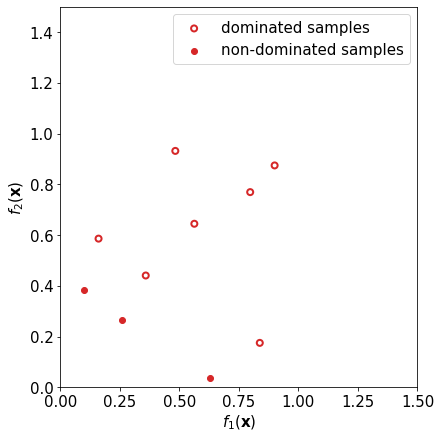

In [8]:
p, d = Pareto_split(saf_opt.y)

fig = plt.figure(figsize=[6.40,7])
ax = fig.gca()
ax.set_xlim([0., 1.5])
ax.set_ylim([0., 1.5])


M, N = 200, 200
x = np.linspace(0., 1.5, M)
y = np.linspace(0., 1.5, N)
xx, yy = np.meshgrid(x, y)
zz = np.zeros((M,N))

# pcol = ax.pcolor(xx, yy, zz)


ax.scatter(d[:,0], d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
ax.scatter(p[:,0], p[:,1], c="C3", label="non-dominated samples")

ax.legend()
# fig.colorbar(pcol)
ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure30_blank_infill")

save_fig(fig, name="figure30a_blank_infill")

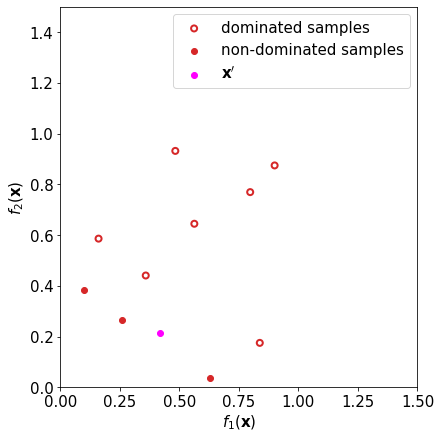

In [9]:
## plot x'
x_ = np.array([0.42, 0.215])
stds = [0.005, 0.01]
ax.scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")
ax.legend()
save_fig(fig, name="figure31a_blank_infill_prediction")
fig

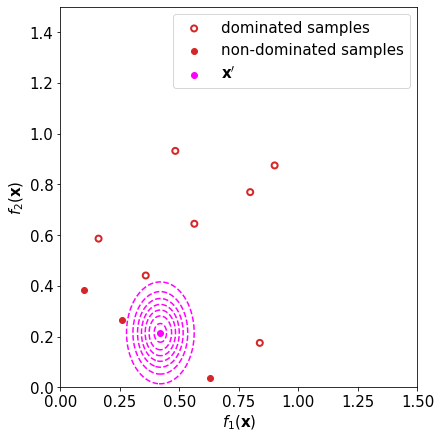

In [10]:
# multivariate probability function
mvp = multivariate_normal(mean=x_, cov=np.diag(stds))
xy = np.vstack((xx.flat, yy.flat)).T
mvp_zz = mvp.pdf(xy).reshape(M,N)
ax.contour(xx, yy, mvp_zz, colors="magenta", linestyles="--")
save_fig(fig, name="figure32a_blank_infill_distribution")
fig

 <ipython-input-11-38d666ae5de1>:8: MatplotlibDeprecationWarning:shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


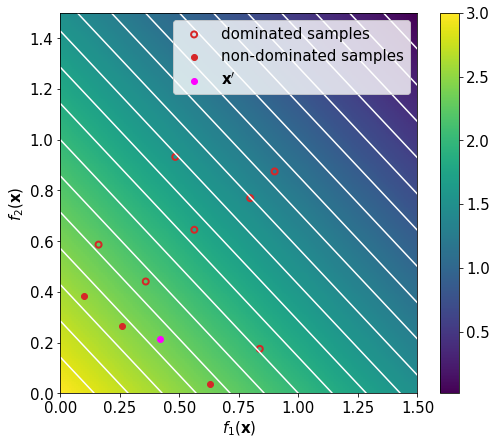

In [11]:
fig = plt.figure(figsize=[8,7])
ax = fig.gca()
ax.set_xlim([0., 1.5])
ax.set_ylim([0., 1.5])

zz = 3-(xx+yy)

pcol = ax.pcolor(xx, yy, zz)

levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
ax.contour(xx, yy, zz, colors="white", levels=levels)

ax.scatter(d[:,0], d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
ax.scatter(p[:,0], p[:,1], c="C3", label="non-dominated samples")

ax.scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")

ax.legend()
fig.colorbar(pcol)
ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure33_linear_infill")

 <ipython-input-5-0b3b2eabe5a0>:21: MatplotlibDeprecationWarning:shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


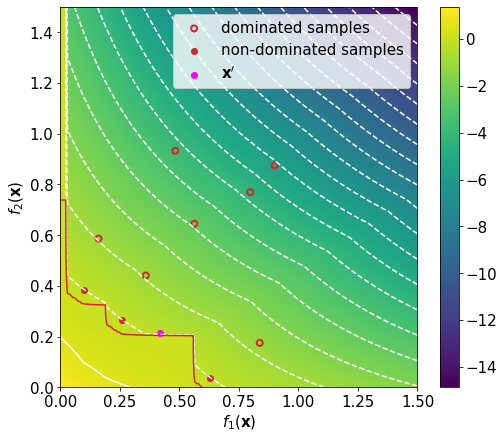

In [12]:
from testsuite.optimisers import SmsEgo

smsego_opt = SmsEgo(objective_function=lambda x: x[0:2], limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
fig_smsego = image_infill(smsego_opt, n_contours=n_contours)
fig_smsego.gca().set_xlabel("$f_1(\mathbf{x})$")
fig_smsego.gca().set_ylabel("$f_2(\mathbf{x})$")
fig_smsego.gca().scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")
fig_smsego.gca().legend()
save_fig(fig_smsego, name="figure34_sms_infill")

 <ipython-input-5-0b3b2eabe5a0>:21: MatplotlibDeprecationWarning:shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


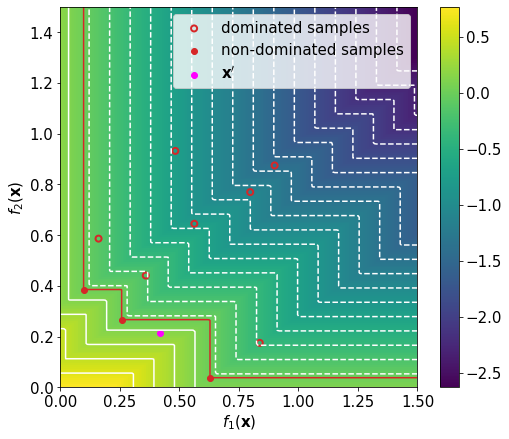

In [13]:
fig_saf = image_infill(saf_opt, n_contours=n_contours)
fig_saf.gca().set_xlabel("$f_1(\mathbf{x})$")
fig_saf.gca().set_ylabel("$f_2(\mathbf{x})$")
fig_saf.gca().scatter(*x_, c="magenta", label=r"$\mathbf{x}'$")
fig_saf.gca().legend()
save_fig(fig_saf, name="figure35_saf_infill")